In [1]:
# 모듈 로드
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import koreanize_matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error


import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 

from sklearn.model_selection import GridSearchCV


import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 로드
df=pd.read_csv('preprocessing_merged2.csv')
df

,year,code,score,hospital_conversion,clinic_conversion,hospital_fee,clinic_fee,C0,C1,C2,...,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79
0,2009,AA154,188.11,63.4,63.4,11926.174,11926.174,2009,전국,49773145,...,183,14242,49,158,11782,17,239,1292,1914,21015
1,2009,AA154,188.11,63.4,63.4,11926.174,11926.174,2009,서울특별시,10208302,...,69,4395,6,29,3313,0,25,1,0,5289
2,2009,AA154,188.11,63.4,63.4,11926.174,11926.174,2009,부산광역시,3543030,...,9,1025,13,7,958,0,16,10,5,1530
3,2009,AA154,188.11,63.4,63.4,11926.174,11926.174,2009,대구광역시,2489781,...,17,709,1,8,734,0,8,9,9,1171
4,2009,AA154,188.11,63.4,63.4,11926.174,11926.174,2009,인천광역시,2710579,...,3,676,1,12,502,0,10,23,24,980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137179,2023,TA006*,3496.35,79.7,92.1,278659.095,322013.835,2023,전북특별자치도,1754757,...,3,604,0,35,502,4,11,148,240,986
1137180,2023,TA006*,3496.35,79.7,92.1,278659.095,322013.835,2023,전라남도,1804217,...,6,513,0,28,356,3,19,216,327,849
1137181,2023,TA006*,3496.35,79.7,92.1,278659.095,322013.835,2023,경상북도,2554324,...,11,696,1,8,618,2,22,216,298,1095
1137182,2023,TA006*,3496.35,79.7,92.1,278659.095,322013.835,2023,경상남도,3251158,...,22,944,1,24,781,1,20,173,220,1372


In [3]:
df.isna().sum()

year                     0
code                   143
score                   68
hospital_conversion      0
clinic_conversion        0
                      ... 
C75                      0
C76                      0
C77                      0
C78                      0
C79                      0
Length: 84, dtype: int64

In [4]:
df=df.dropna(subset=['score'])
df.isna().sum()

year                     0
code                   143
score                    0
hospital_conversion      0
clinic_conversion        0
                      ... 
C75                      0
C76                      0
C77                      0
C78                      0
C79                      0
Length: 84, dtype: int64

In [5]:
df=df.dropna(subset=['code'])
df.isna().sum()

year                   0
code                   0
score                  0
hospital_conversion    0
clinic_conversion      0
                      ..
C75                    0
C76                    0
C77                    0
C78                    0
C79                    0
Length: 84, dtype: int64

In [6]:
label_encoder = LabelEncoder()
df['code'] = label_encoder.fit_transform(df['code'])

df

,year,code,score,hospital_conversion,clinic_conversion,hospital_fee,clinic_fee,C0,C1,C2,...,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79
0,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,전국,49773145,...,183,14242,49,158,11782,17,239,1292,1914,21015
1,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,서울특별시,10208302,...,69,4395,6,29,3313,0,25,1,0,5289
2,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,부산광역시,3543030,...,9,1025,13,7,958,0,16,10,5,1530
3,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,대구광역시,2489781,...,17,709,1,8,734,0,8,9,9,1171
4,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,인천광역시,2710579,...,3,676,1,12,502,0,10,23,24,980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137179,2023,9045,3496.35,79.7,92.1,278659.095,322013.835,2023,전북특별자치도,1754757,...,3,604,0,35,502,4,11,148,240,986
1137180,2023,9045,3496.35,79.7,92.1,278659.095,322013.835,2023,전라남도,1804217,...,6,513,0,28,356,3,19,216,327,849
1137181,2023,9045,3496.35,79.7,92.1,278659.095,322013.835,2023,경상북도,2554324,...,11,696,1,8,618,2,22,216,298,1095
1137182,2023,9045,3496.35,79.7,92.1,278659.095,322013.835,2023,경상남도,3251158,...,22,944,1,24,781,1,20,173,220,1372


In [8]:
label_encoder = LabelEncoder()
df['C1'] = label_encoder.fit_transform(df['C1'])

df

,year,code,score,hospital_conversion,clinic_conversion,hospital_fee,clinic_fee,C0,C1,C2,...,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79
0,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,12,49773145,...,183,14242,49,158,11782,17,239,1292,1914,21015
1,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,8,10208302,...,69,4395,6,29,3313,0,25,1,0,5289
2,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,7,3543030,...,9,1025,13,7,958,0,16,10,5,1530
3,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,5,2489781,...,17,709,1,8,734,0,8,9,9,1171
4,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,11,2710579,...,3,676,1,12,502,0,10,23,24,980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137179,2023,9045,3496.35,79.7,92.1,278659.095,322013.835,2023,14,1754757,...,3,604,0,35,502,4,11,148,240,986
1137180,2023,9045,3496.35,79.7,92.1,278659.095,322013.835,2023,13,1804217,...,6,513,0,28,356,3,19,216,327,849
1137181,2023,9045,3496.35,79.7,92.1,278659.095,322013.835,2023,3,2554324,...,11,696,1,8,618,2,22,216,298,1095
1137182,2023,9045,3496.35,79.7,92.1,278659.095,322013.835,2023,2,3251158,...,22,944,1,24,781,1,20,173,220,1372


In [64]:
# 라벨 매핑 확인
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("Label Mapping:", label_mapping)

Label Mapping: {0: '강원특별자치도', 1: '경기도', 2: '경상남도', 3: '경상북도', 4: '광주광역시', 5: '대구광역시', 6: '대전광역시', 7: '부산광역시', 8: '서울특별시', 9: '세종특별자치시', 10: '울산광역시', 11: '인천광역시', 12: '전국', 13: '전라남도', 14: '전북특별자치도', 15: '제주특별자치도', 16: '충청남도', 17: '충청북도'}


In [10]:
df.columns

Index(['year', 'code', 'score', 'hospital_conversion', 'clinic_conversion',
       'hospital_fee', 'clinic_fee', 'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C17',
       'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28',
       'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38',
       'C39', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48',
       'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58',
       'C59', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C69',
       'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79'],
      dtype='object')

In [29]:

# feature와 target 분리
target=df['C63']
features = df.drop(columns=['C63'])
features.head(), target.head()

(   year  code   score  hospital_conversion  clinic_conversion  hospital_fee  \
 0  2009   696  188.11                 63.4               63.4     11926.174   
 1  2009   696  188.11                 63.4               63.4     11926.174   
 2  2009   696  188.11                 63.4               63.4     11926.174   
 3  2009   696  188.11                 63.4               63.4     11926.174   
 4  2009   696  188.11                 63.4               63.4     11926.174   
 
    clinic_fee    C0  C1        C2  ...  C70    C71  C72  C73    C74  C75  C76  \
 0   11926.174  2009  12  49773145  ...  183  14242   49  158  11782   17  239   
 1   11926.174  2009   8  10208302  ...   69   4395    6   29   3313    0   25   
 2   11926.174  2009   7   3543030  ...    9   1025   13    7    958    0   16   
 3   11926.174  2009   5   2489781  ...   17    709    1    8    734    0    8   
 4   11926.174  2009  11   2710579  ...    3    676    1   12    502    0   10   
 
     C77   C78    C79  


>>>> 선형 회귀 모델 학습/예측/평가

In [30]:
def get_rmse(model):
    pred=model.predict(X_test)
    mse=mean_squared_error(y_test,pred)
    rmse=np.sqrt(mse)
    print(model.__class__.__name__,'로그 변환된 RMSE:',np.round(rmse,3))
    return rmse

In [31]:
def get_rmses(models):
    rmses=[]
    for model in models:
        rmse=get_rmse(model)
        rmses.append(rmse)
    return rmses

In [32]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=64)

In [33]:
# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)

models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)



LinearRegression 로그 변환된 RMSE: 3.998
Ridge 로그 변환된 RMSE: 3.998
Lasso 로그 변환된 RMSE: 121.961


[3.9983670909717146, 3.9983694303998965, 121.96078538174368]

In [34]:
# 회귀 계수 값의 상위10개, 하위10개 피처명과 회귀 계수 값을 반환하는 함수
def get_top_bottom_coef(model,n=10):
    #coef_ 속성을 기반으로 Series 객체를 생성, index는 칼럼명.
    coef = pd.Series(model.coef_, index=X_train.columns)

    # 상위 10개, 하위10개의 회귀 계수 반환
    coef_high=coef.sort_values(ascending=False).head(n)
    coef_low=coef.sort_values(ascending=False).tail(n)
    return coef_high,coef_low



In [35]:
# 모델 회귀 계수 시각화 함수
def visualize_coefficient(models):
    # 3개의 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot 생성
    fig,axs=plt.subplots(figsize=(24,10), nrows=1,ncols=3)
    fig.tight_layout()

    #회귀계수시각화
    for i_num,model in enumerate(models):
        # 상위10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
        coef_high,coef_low=get_top_bottom_coef(model)
        coef_concat=pd.concat([coef_high,coef_low])
        #ax subplot에 barchar로 표현, 한 화며에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+'Coeffiecents',size=25)
        axs[i_num].tick_params(axis="y",direction="in",pad=-120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index,ax=axs[i_num])

In [36]:
def print_best_params(model, params):
    grid_model=GridSearchCV(model,param_grid=params,
                            scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(X_train,y_train)

    # RMSE 계산
    rmse = np.sqrt(-1 * grid_model.best_score_)
    # 최적의 모델을 이용하여 R2 Score 계산
    best_r2_score = grid_model.best_estimator_.score(X_train, y_train)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 R2 Score: {2}, 최적 파라미터: {3}'.format(
        model.__class__.__name__,  # 모델 클래스 이름
        np.round(rmse, 4),  # RMSE 값 반올림
        np.round(best_r2_score, 4),  # R2 Score 값 반올림
        grid_model.best_params_  # 최적 파라미터
    ))

In [37]:
ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 3.9897, 최적 R2 Score: 1.0, 최적 파라미터: {'alpha': 0.1}
Lasso 5 CV 시 최적 평균 RMSE 값: 122.0158, 최적 R2 Score: 1.0, 최적 파라미터: {'alpha': 0.1}


LinearRegression 로그 변환된 RMSE: 3.998
Ridge 로그 변환된 RMSE: 3.998
Lasso 로그 변환된 RMSE: 121.376


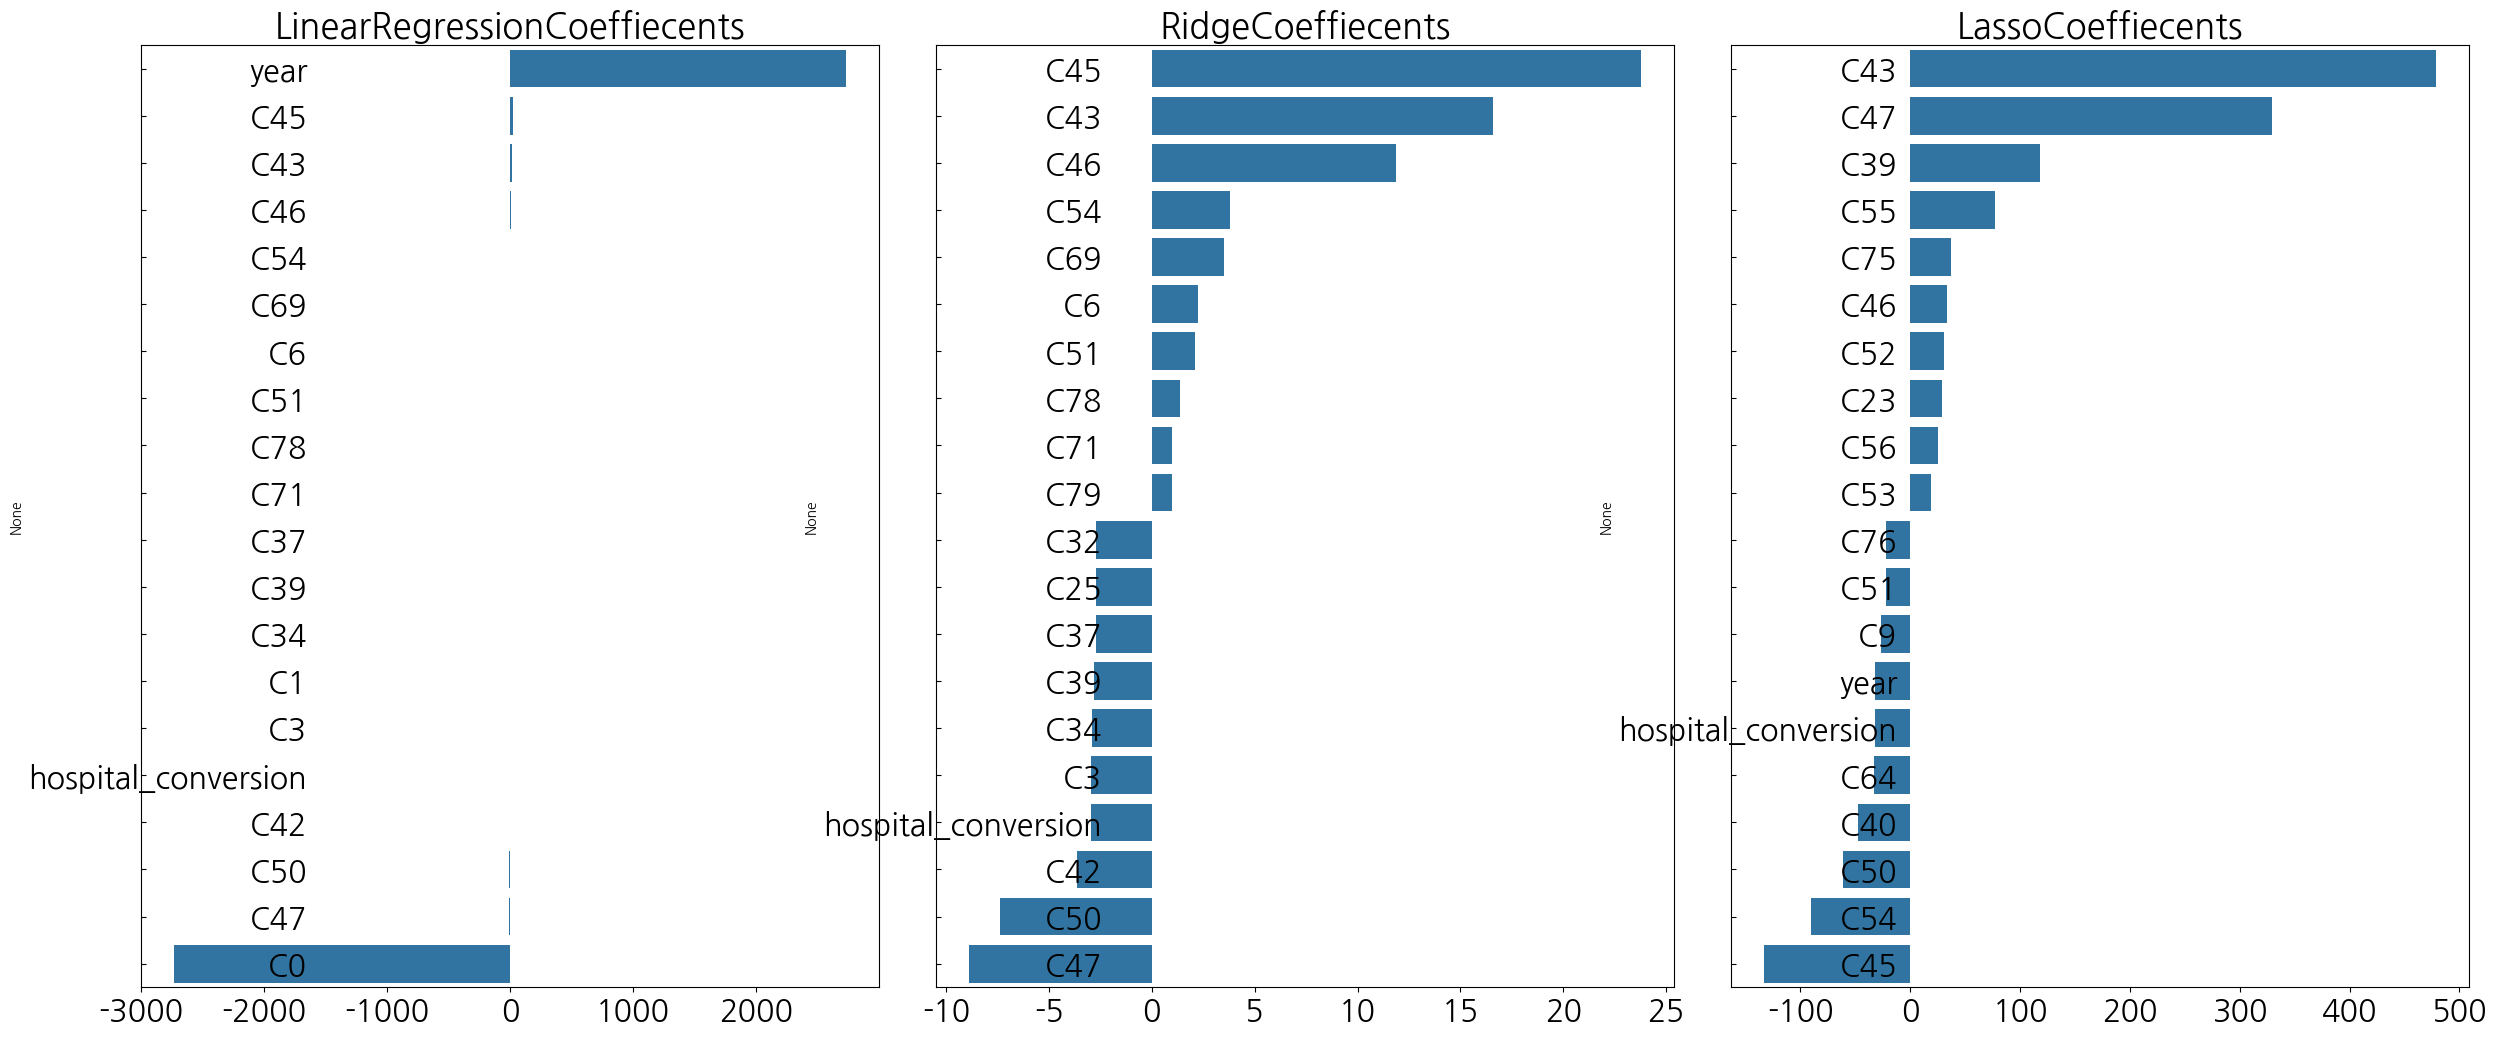

In [40]:
# 최적화 alpha 값으로 학습 데이터 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge(alpha=0.01)
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso(alpha=0.01)
lasso_reg.fit(X_train,y_train)

# 모든 모델의 RMSE 출력
models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models=[lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

In [43]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators' :[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,colsample_bytree=0.5, subsample=0.8)

print_best_params(xgb_reg,xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.022, 최적 R2 Score: 1.0, 최적 파라미터: {'n_estimators': 1000}


In [45]:
# 모델 학습
xgb_reg.fit(X_train, y_train)

# Booster 객체 가져오기
booster = xgb_reg.get_booster()

# 피처 중요도 계산
feature_importance = booster.get_score(importance_type='weight')

# 출력
print(feature_importance)

{'year': 4637.0, 'hospital_conversion': 2221.0, 'clinic_conversion': 1132.0, 'C0': 489.0, 'C1': 859.0, 'C2': 1606.0, 'C3': 111.0, 'C4': 31.0, 'C5': 34.0, 'C6': 25.0, 'C10': 1151.0, 'C11': 1353.0, 'C12': 557.0, 'C13': 432.0, 'C14': 517.0, 'C15': 459.0, 'C17': 359.0, 'C19': 330.0, 'C20': 183.0, 'C21': 151.0, 'C22': 216.0, 'C23': 207.0, 'C24': 512.0, 'C25': 384.0, 'C26': 130.0, 'C27': 169.0, 'C28': 102.0, 'C29': 134.0, 'C30': 206.0, 'C31': 171.0, 'C32': 429.0, 'C33': 142.0, 'C34': 290.0, 'C35': 70.0, 'C36': 120.0, 'C37': 53.0, 'C39': 77.0, 'C40': 32.0, 'C41': 17.0, 'C42': 147.0, 'C43': 4.0, 'C44': 225.0, 'C45': 55.0, 'C46': 2.0, 'C47': 7.0, 'C48': 129.0, 'C49': 176.0, 'C50': 259.0, 'C51': 427.0, 'C52': 264.0, 'C53': 844.0, 'C54': 148.0, 'C55': 216.0, 'C56': 682.0, 'C57': 309.0, 'C58': 107.0, 'C59': 352.0, 'C60': 195.0, 'C61': 157.0, 'C62': 657.0, 'C64': 8.0, 'C65': 66.0, 'C66': 460.0, 'C67': 247.0, 'C69': 104.0, 'C70': 29.0, 'C71': 64.0, 'C72': 144.0, 'C73': 140.0, 'C74': 79.0, 'C75': 17.

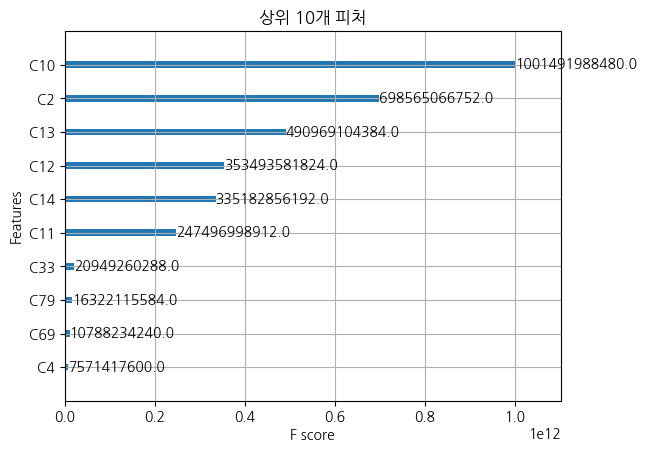

In [52]:
from xgboost import plot_importance
# 피처 중요도 플롯

# 상위 10개 피처 중요도 시각화
plot_importance(booster, importance_type='gain', max_num_features=10)
plt.title('상위 10개 피처')
plt.show()

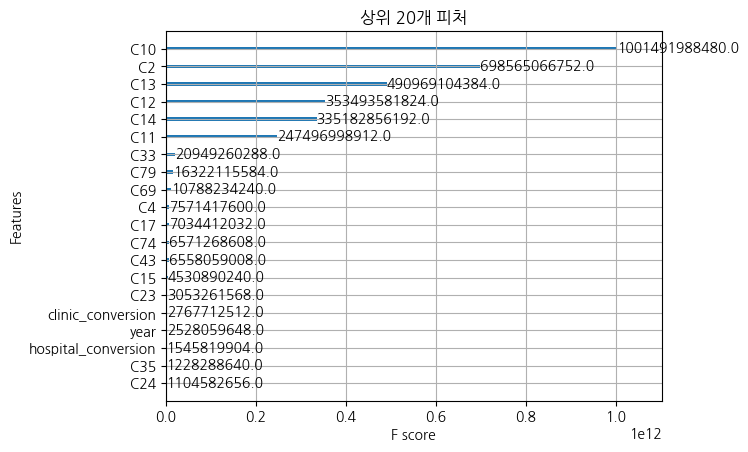

In [54]:
from xgboost import plot_importance
# 피처 중요도 플롯

# 상위 10개 피처 중요도 시각화
plot_importance(booster, importance_type='gain', max_num_features=20)
plt.title('상위 20개 피처')
plt.show()

In [50]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg=LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                       subsample=0.6, colsample_bytree=0.4, reg_lambda=10,n_jobs=-1)
print_best_params(lgbm_reg, lgbm_params)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.125518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10663
[LightGBM] [Info] Number of data points in the train set: 727662, number of used features: 82
[LightGBM] [Info] Start training from score 10306.029104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.202858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10670
[LightGBM] [Info] Number of data points in the train set: 727662, number of used features: 82
[LightGBM] [Info] Start training from score 10310.354699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.192274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10668
[LightGBM] [Info] Number of data points in the train set: 727662, number of used features: 82
[LightGBM] [I

In [77]:
# feature와 target 분리
target=df['C63']
features = df[['C1','C2','C4','clinic_conversion','C0','hospital_conversion']]
features.head(), target.head()

(   C1        C2    C4  clinic_conversion    C0  hospital_conversion
 0  12  49773145  63.4               63.4  2009                 63.4
 1   8  10208302  63.4               63.4  2009                 63.4
 2   7   3543030  63.4               63.4  2009                 63.4
 3   5   2489781  63.4               63.4  2009                 63.4
 4  11   2710579  63.4               63.4  2009                 63.4,
 0    80270
 1    20560
 2     5864
 3     4273
 4     3643
 Name: C63, dtype: int64)

In [78]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=64)

In [79]:
# 모델 학습
xgb_reg.fit(X_train, y_train)

# Booster 객체 가져오기
booster = xgb_reg.get_booster()

# 피처 중요도 계산
feature_importance = booster.get_score(importance_type='weight')

# 출력
print("Feature Importance (Weight):", feature_importance)

# 모델 예측
y_train_pred = xgb_reg.predict(X_train)  # 트레인 데이터 예측
y_test_pred = xgb_reg.predict(X_test)    # 테스트 데이터 예측

# Train 데이터 성능
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²: {train_r2:.4f}")

# Test 데이터 성능
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Train vs Test 성능 비교
print("\nPerformance Comparison:")
print(f"Train vs Test RMSE Difference: {abs(train_rmse - test_rmse):.4f}")
print(f"Train vs Test R² Difference: {abs(train_r2 - test_r2):.4f}")

Feature Importance (Weight): {'C1': 6094.0, 'C2': 10298.0, 'C4': 7172.0, 'clinic_conversion': 3873.0, 'C0': 1971.0, 'hospital_conversion': 313.0}
Train RMSE: 0.2038
Train R²: 1.0000
Test RMSE: 0.2021
Test R²: 1.0000

Performance Comparison:
Train vs Test RMSE Difference: 0.0017
Train vs Test R² Difference: 0.0000


In [87]:
X_test

,C1,C2,C4,clinic_conversion,C0,hospital_conversion
549788,2,3373988,81.4,81.4,2018,73.5
314291,14,1871560,72.2,72.2,2014,68.8
926562,13,1832803,87.6,87.6,2021,77.3
992765,14,1769607,90.2,90.2,2022,78.4
33622,13,1913004,63.4,63.4,2009,63.4
...,...,...,...,...,...,...
734717,14,1804104,85.8,85.8,2020,76.2
479970,7,3470653,79.0,79.0,2017,72.3
357064,12,51529338,74.4,74.4,2015,70.0
563339,14,1836832,81.4,81.4,2018,73.5


In [90]:
# 2025 ~ 2030년도 의료 수가 20% 인상 시 병원수 예측
year=range(2025,2031)
locals=[12,8,0,15] # 전국, 서울, 강원 제주
clinic=	92.1
c4=92.1
hospital=79.7
c2=51325329,9386034,1527807,675252


In [157]:
clinic_20p = [clinic]
for _ in range(5):  # 5번 반복
    clinic_20p.append(clinic_20p[-1] * 1.2)

clinic_20p

[92.1, 110.52, 132.624, 159.1488, 190.97856, 229.17427199999997]

In [158]:
hospital_20p = [hospital]
for _ in range(5):  # 5번 반복
    hospital_20p.append(hospital_20p[-1] * 1.2)

hospital_20p

[79.7, 95.64, 114.768, 137.7216, 165.26592, 198.31910399999998]

In [159]:
c4_20p = [c4]
for _ in range(5):  # 5번 반복
    c4_20p.append(c4_20p[-1] * 1.2)

c4_20p

[92.1, 110.52, 132.624, 159.1488, 190.97856, 229.17427199999997]

In [162]:
# 데이터프레임 생성
df2= pd.DataFrame({
    "C1": c2 * len(year),             # c2를 지역과 매핑
    "C2": locals * len(year),      # 지역을 반복
    "C4": c4_20p * len(locals),
    "clinic_conversion": clinic_20p * len(locals),
    "C0": list(year) * len(locals),  # 연도를 반복    
    "hospital_conversion": hospital_20p * len(locals)
    
})

df2


,C1,C2,C4,clinic_conversion,C0,hospital_conversion
0,51325329,12,92.100000,92.100000,2025,79.700000
1,9386034,8,110.520000,110.520000,2026,95.640000
2,1527807,0,132.624000,132.624000,2027,114.768000
3,675252,15,159.148800,159.148800,2028,137.721600
4,51325329,12,190.978560,190.978560,2029,165.265920
5,9386034,8,229.174272,229.174272,2030,198.319104
6,1527807,0,92.100000,92.100000,2025,79.700000
7,675252,15,110.520000,110.520000,2026,95.640000
8,51325329,12,132.624000,132.624000,2027,114.768000
9,9386034,8,159.148800,159.148800,2028,137.721600


In [163]:
xgb_reg.predict(df2)

array([2069.8914, 2069.8914, 2069.8914, 2069.8914, 2069.8914, 2069.8914,
       2069.8914, 2069.8914, 2069.8914, 2069.8914, 2069.8914, 2069.8914,
       2069.8914, 2069.8914, 2069.8914, 2069.8914, 2069.8914, 2069.8914,
       2069.8914, 2069.8914, 2069.8914, 2069.8914, 2069.8914, 2069.8914],
      dtype=float32)

In [164]:
# 데이터 로드
populationdf=pd.read_excel('../data/행정구역_시군구_별__성별_인구수_20241105154655.xlsx')
populationdf

,시점,행정구역(시군구)별,총인구수 (명)
0,2008,전국,49540367.0
1,2008,서울특별시,10200827.0
2,2008,부산광역시,3564577.0
3,2008,대구광역시,2492724.0
4,2008,인천광역시,2692696.0
...,...,...,...
405,2030,전북특별자치도,NaN
406,2030,전라남도,NaN
407,2030,경상북도,NaN
408,2030,경상남도,NaN


In [165]:
populationdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시점          410 non-null    int64  
 1   행정구역(시군구)별  410 non-null    object 
 2   총인구수 (명)    284 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.7+ KB


In [166]:
col=populationdf['행정구역(시군구)별'].unique() 
col

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도', '세종특별자치시'], dtype=object)

In [167]:
# 보간 처리
for c in col:
    cols_to_interpolate = ['총인구수 (명)']
    # 특정 '행정구역(시군구)별'의 데이터에 대해 보간 적용
    populationdf.loc[populationdf['행정구역(시군구)별'] == c, cols_to_interpolate] = (
        populationdf.loc[populationdf['행정구역(시군구)별'] == c, cols_to_interpolate]
        .interpolate(method='linear', axis=0)
    )

# 보간 완료된 데이터프레임 출력
print(populationdf)

       시점 행정구역(시군구)별    총인구수 (명)
0    2008         전국  49540367.0
1    2008      서울특별시  10200827.0
2    2008      부산광역시   3564577.0
3    2008      대구광역시   2492724.0
4    2008      인천광역시   2692696.0
..    ...        ...         ...
405  2030    전북특별자치도   1754757.0
406  2030       전라남도   1804217.0
407  2030       경상북도   2554324.0
408  2030       경상남도   3251158.0
409  2030    제주특별자치도    675252.0

[410 rows x 3 columns]


In [168]:
pop_df=populationdf.loc[populationdf['시점'] > 2025]

In [169]:
pop_df

,시점,행정구역(시군구)별,총인구수 (명)
320,2026,전국,51325329.0
321,2026,서울특별시,9386034.0
322,2026,부산광역시,3293362.0
323,2026,대구광역시,2374960.0
324,2026,인천광역시,2997410.0
...,...,...,...
405,2030,전북특별자치도,1754757.0
406,2030,전라남도,1804217.0
407,2030,경상북도,2554324.0
408,2030,경상남도,3251158.0


In [170]:
merged_df = pd.merge(df2,populationdf, left_on='C0', right_on='시점', how='inner')
merged_df

,C1,C2,C4,clinic_conversion,C0,hospital_conversion,시점,행정구역(시군구)별,총인구수 (명)
0,51325329,12,92.100000,92.100000,2025,79.700000,2025,전국,51325329.0
1,51325329,12,92.100000,92.100000,2025,79.700000,2025,서울특별시,9386034.0
2,51325329,12,92.100000,92.100000,2025,79.700000,2025,부산광역시,3293362.0
3,51325329,12,92.100000,92.100000,2025,79.700000,2025,대구광역시,2374960.0
4,51325329,12,92.100000,92.100000,2025,79.700000,2025,인천광역시,2997410.0
...,...,...,...,...,...,...,...,...,...
427,675252,15,229.174272,229.174272,2030,198.319104,2030,전북특별자치도,1754757.0
428,675252,15,229.174272,229.174272,2030,198.319104,2030,전라남도,1804217.0
429,675252,15,229.174272,229.174272,2030,198.319104,2030,경상북도,2554324.0
430,675252,15,229.174272,229.174272,2030,198.319104,2030,경상남도,3251158.0


In [171]:
merged_df=merged_df.drop(columns=['시점','행정구역(시군구)별','C1'])
merged_df

,C2,C4,clinic_conversion,C0,hospital_conversion,총인구수 (명)
0,12,92.100000,92.100000,2025,79.700000,51325329.0
1,12,92.100000,92.100000,2025,79.700000,9386034.0
2,12,92.100000,92.100000,2025,79.700000,3293362.0
3,12,92.100000,92.100000,2025,79.700000,2374960.0
4,12,92.100000,92.100000,2025,79.700000,2997410.0
...,...,...,...,...,...,...
427,15,229.174272,229.174272,2030,198.319104,1754757.0
428,15,229.174272,229.174272,2030,198.319104,1804217.0
429,15,229.174272,229.174272,2030,198.319104,2554324.0
430,15,229.174272,229.174272,2030,198.319104,3251158.0


In [172]:
merged_df.columns = ['C2', 'C4', 'clinic_conversion','C0','hospital_conversion','C1']
merged_df

,C2,C4,clinic_conversion,C0,hospital_conversion,C1
0,12,92.100000,92.100000,2025,79.700000,51325329.0
1,12,92.100000,92.100000,2025,79.700000,9386034.0
2,12,92.100000,92.100000,2025,79.700000,3293362.0
3,12,92.100000,92.100000,2025,79.700000,2374960.0
4,12,92.100000,92.100000,2025,79.700000,2997410.0
...,...,...,...,...,...,...
427,15,229.174272,229.174272,2030,198.319104,1754757.0
428,15,229.174272,229.174272,2030,198.319104,1804217.0
429,15,229.174272,229.174272,2030,198.319104,2554324.0
430,15,229.174272,229.174272,2030,198.319104,3251158.0


In [173]:
merged_df = merged_df[['C1',	'C2',	'C4',	'clinic_conversion',	'C0',	'hospital_conversion']]
merged_df


,C1,C2,C4,clinic_conversion,C0,hospital_conversion
0,51325329.0,12,92.100000,92.100000,2025,79.700000
1,9386034.0,12,92.100000,92.100000,2025,79.700000
2,3293362.0,12,92.100000,92.100000,2025,79.700000
3,2374960.0,12,92.100000,92.100000,2025,79.700000
4,2997410.0,12,92.100000,92.100000,2025,79.700000
...,...,...,...,...,...,...
427,1754757.0,15,229.174272,229.174272,2030,198.319104
428,1804217.0,15,229.174272,229.174272,2030,198.319104
429,2554324.0,15,229.174272,229.174272,2030,198.319104
430,3251158.0,15,229.174272,229.174272,2030,198.319104


In [174]:
merged_df['result']=xgb_reg.predict(merged_df)
merged_df

,C1,C2,C4,clinic_conversion,C0,hospital_conversion,result
0,51325329.0,12,92.100000,92.100000,2025,79.700000,2069.891357
1,9386034.0,12,92.100000,92.100000,2025,79.700000,2069.891357
2,3293362.0,12,92.100000,92.100000,2025,79.700000,2069.891357
3,2374960.0,12,92.100000,92.100000,2025,79.700000,2069.891357
4,2997410.0,12,92.100000,92.100000,2025,79.700000,2069.891357
...,...,...,...,...,...,...,...
427,1754757.0,15,229.174272,229.174272,2030,198.319104,2069.891357
428,1804217.0,15,229.174272,229.174272,2030,198.319104,2069.891357
429,2554324.0,15,229.174272,229.174272,2030,198.319104,2069.891357
430,3251158.0,15,229.174272,229.174272,2030,198.319104,2069.891357


In [175]:
print(merged_df)

             C1  C2          C4  clinic_conversion    C0  hospital_conversion  \
0    51325329.0  12   92.100000          92.100000  2025            79.700000   
1     9386034.0  12   92.100000          92.100000  2025            79.700000   
2     3293362.0  12   92.100000          92.100000  2025            79.700000   
3     2374960.0  12   92.100000          92.100000  2025            79.700000   
4     2997410.0  12   92.100000          92.100000  2025            79.700000   
..          ...  ..         ...                ...   ...                  ...   
427   1754757.0  15  229.174272         229.174272  2030           198.319104   
428   1804217.0  15  229.174272         229.174272  2030           198.319104   
429   2554324.0  15  229.174272         229.174272  2030           198.319104   
430   3251158.0  15  229.174272         229.174272  2030           198.319104   
431    675252.0  15  229.174272         229.174272  2030           198.319104   

          result  
0    206